# Analyze pharmaceutical stocks with clustering

In [ ]:
# import libraries and packages

%matplotlib inline
from pathlib import Path
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [ ]:
# import dataset
pharma_df = pd.read_csv('Pharmaceuticals.csv')
pharma_df.set_index('Name', inplace=True)
pharma_df

# only use the important numeric variables from 1-9:
numeric = ['Market_Cap', 'Beta', 'PE_Ratio', 'ROE','ROA', 'Asset_Turnover', 'Leverage', 'Rev_Growth', 'Net_Profit_Margin' ]

# conversion of integer data to float will avoid a warning when applying the scale function
pharma_df[numeric] = pharma_df[numeric].apply(lambda x: x.astype('float64'))
pharma_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Abbott Laboratories to Wyeth
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Symbol                 21 non-null     object 
 1   Market_Cap             21 non-null     float64
 2   Beta                   21 non-null     float64
 3   PE_Ratio               21 non-null     float64
 4   ROE                    21 non-null     float64
 5   ROA                    21 non-null     float64
 6   Asset_Turnover         21 non-null     float64
 7   Leverage               21 non-null     float64
 8   Rev_Growth             21 non-null     float64
 9   Net_Profit_Margin      21 non-null     float64
 10  Median_Recommendation  21 non-null     object 
 11  Location               21 non-null     object 
 12  Exchange               21 non-null     object 
dtypes: float64(9), object(4)
memory usage: 2.3+ KB


In [ ]:
num_df = pharma_df[numeric]
num_df

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
Name,,,,,,,,,
Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1
"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5
Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2
AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0
Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9
Bayer AG,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6
Bristol-Myers Squibb Company,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6
"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5
"Elan Corporation, plc",0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3


In [ ]:
#Euclidean distance used as the most popular method (dissimilarity matrix)

d = pairwise.pairwise_distances(num_df, metric='euclidean')
pd.DataFrame(d, columns=num_df.index, index=num_df.index)

Name,Abbott Laboratories,"Allergan, Inc.",Amersham plc,AstraZeneca PLC,Aventis,Bayer AG,Bristol-Myers Squibb Company,"Chattem, Inc","Elan Corporation, plc",Eli Lilly and Company,GlaxoSmithKline plc,IVAX Corporation,Johnson & Johnson,Medicis Pharmaceutical Corporation,"Merck & Co., Inc.",Novartis AG,Pfizer Inc,Pharmacia Corporation,Schering-Plough Corporation,"Watson Pharmaceuticals, Inc.",Wyeth
Name,,,,,,,,,,,,,,,,,,,,,
Abbott Laboratories,0.000,85.917,63.639,9.186,29.921,59.823,23.122,69.112,76.915,1.089e+01,67.530,66.908,105.706,73.193,66.763,31.977,134.166,38.689,35.115,71.028,38.729
"Allergan, Inc.",85.917,0.000,62.187,88.465,76.876,57.682,86.380,58.232,83.462,8.996e+01,142.833,63.812,176.398,60.406,143.749,110.119,205.438,55.513,71.066,68.042,93.647
Amersham plc,63.639,62.187,0.000,63.918,45.946,22.476,51.290,13.585,32.767,7.110e+01,127.268,10.359,168.729,27.470,129.506,91.679,197.316,62.133,30.149,23.298,60.778
AstraZeneca PLC,9.186,88.465,63.918,0.000,26.086,62.694,23.166,69.785,73.754,1.425e+01,65.738,66.285,106.683,71.233,66.467,35.814,133.772,41.914,34.643,68.794,38.479
Aventis,29.921,76.876,45.946,26.086,0.000,48.371,30.387,51.892,50.300,3.779e+01,86.987,46.428,128.812,48.838,88.292,58.660,155.135,40.625,23.699,45.559,45.161
Bayer AG,59.823,57.682,22.476,62.694,48.371,0.000,53.695,28.628,50.025,6.815e+01,126.394,31.165,160.881,42.332,124.676,84.172,191.680,53.189,35.088,39.354,66.944
Bristol-Myers Squibb Company,23.122,86.380,51.290,23.166,30.387,53.695,0.000,56.253,64.781,2.720e+01,78.810,53.662,123.826,64.396,83.150,49.465,150.718,52.050,22.751,61.130,21.149
"Chattem, Inc",69.112,58.232,13.585,69.785,51.892,28.628,56.253,0.000,37.387,7.609e+01,130.659,11.401,174.379,30.785,134.445,98.408,202.501,65.162,37.255,29.228,62.022
"Elan Corporation, plc",76.915,83.462,32.767,73.754,50.300,50.025,64.781,37.387,0.000,8.449e+01,132.887,26.947,177.605,26.821,136.510,104.911,203.039,79.267,46.324,16.797,72.704


In [ ]:
# Normalize data
# pandas uses sample standard deviation/ n-1 so this was used
num_df_norm = (num_df - num_df.mean())/num_df.std()
num_df_norm

#num_df_norm = num_df.apply(preprocessing.scale, axis=0)
#num_df_norm

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
Name,,,,,,,,,
Abbott Laboratories,0.184,-0.801,-0.047,0.040,0.242,-5.121e-16,-0.212,-0.528,0.062
"Allergan, Inc.",-0.854,-0.451,3.497,-0.855,-0.942,9.225e-01,0.018,-0.381,-1.554
Amersham plc,-0.876,-0.256,-0.292,-0.722,-0.510,9.225e-01,-0.404,-0.572,-0.685
AstraZeneca PLC,0.170,-0.022,-0.243,0.106,0.918,9.225e-01,-0.750,0.147,0.351
Aventis,-0.179,-0.801,-0.329,-0.265,-0.566,-4.613e-01,-0.314,1.216,-0.426
Bayer AG,-0.695,2.276,0.149,-1.451,-1.713,-4.613e-01,-0.750,-1.497,-1.996
Bristol-Myers Squibb Company,-0.108,-0.100,-0.709,0.597,0.862,9.225e-01,-0.020,-0.966,0.747
"Chattem, Inc",-0.977,1.263,0.033,-0.112,-1.168,-4.613e-01,3.743,-0.633,-1.249
"Elan Corporation, plc",-0.970,2.159,-1.340,-0.709,-1.017,-1.845e+00,0.620,1.886,-0.365


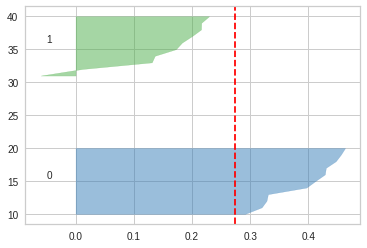

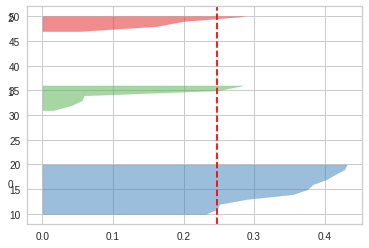

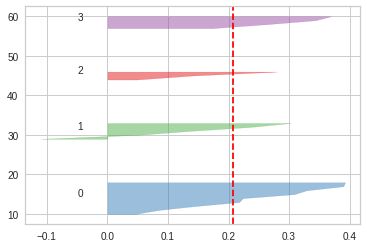

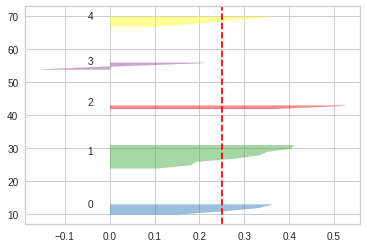

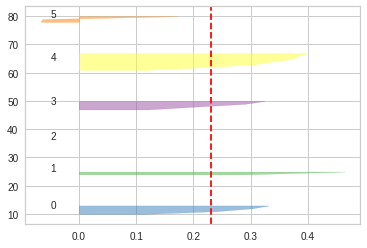

In [ ]:
#Silhoutte Score
from yellowbrick.cluster import SilhouetteVisualizer
for i in [2, 3, 4, 5, 6]:

  km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
  visualizer = SilhouetteVisualizer(km)
  visualizer.fit(num_df_norm)
  plt.show()

The value of 4 for n_clusters looks at first glance to be the optimal one. The silhouette score for each cluster is above average silhouette scores.  The thickness of the silhouette plot representing each cluster also is a deciding point. However, there's a negative fluctuation in the silhouette score on one of the clusters therefore 3 clusters seem to be the next best choice.

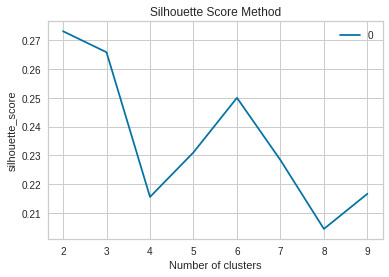

In [ ]:
#Check silhoutte score plot for each k

from sklearn.metrics import silhouette_samples,silhouette_score
import numpy as np
sillhoute_scores = []

n_cluster_list = np.arange(2,10).astype(int)

for n_cluster in n_cluster_list:
    
    kmeans = KMeans(n_clusters=n_cluster,random_state=0)
    cluster_found = kmeans.fit_predict(num_df_norm)
    sillhoute_scores.append(silhouette_score(num_df_norm, kmeans.labels_))

silbycluster = pd.DataFrame(sillhoute_scores,n_cluster_list)
silbycluster.plot()
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()

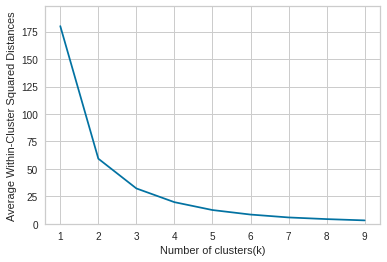

In [ ]:
#Elbow Plot (elbow is at 2 or 3)

inertia = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(num_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 10), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

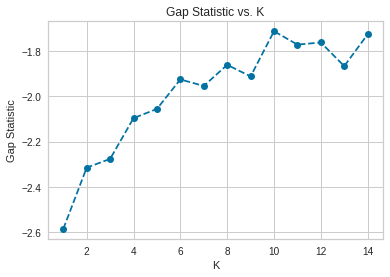

In [ ]:
#Check with Gap Statistic 

def optimalK(data, nrefs=2, maxClusters=10):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
    
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k,random_state=0)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
            
# Fit cluster to original data and create dispersion
        km = KMeans(k,random_state=0)
        km.fit(data)
        
        origDisp = km.inertia_
        
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
    
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)
score_g, df = optimalK(num_df_norm, nrefs=2, maxClusters=15)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

In [ ]:
# Fit a k-Means clustering with k=3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(num_df_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=num_df_norm.index)
print('\033[1m'+'k-Means cluster membership:'+'\033[0m')
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

k-Means cluster membership:
0 :  Aventis, Elan Corporation, plc, Medicis Pharmaceutical Corporation, Watson Pharmaceuticals, Inc.
1 :  Abbott Laboratories, AstraZeneca PLC, Bristol-Myers Squibb Company, Eli Lilly and Company, GlaxoSmithKline plc, Johnson & Johnson, Merck & Co., Inc., Novartis AG, Pfizer Inc, Schering-Plough Corporation, Wyeth
2 :  Allergan, Inc., Amersham plc, Bayer AG, Chattem, Inc, IVAX Corporation, Pharmacia Corporation


In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, 
   columns=num_df_norm.columns)
pd.set_option('precision', 3)
centroids


,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
0,-0.760,0.280,-0.477,-0.744,-0.811,-1.268e+00,0.063,1.518,-0.007
1,0.673,-0.359,-0.276,0.657,0.834,4.613e-01,-0.333,-0.290,0.682
2,-0.728,0.471,0.825,-0.708,-0.989,-3.172e-16,0.569,-0.480,-1.246


In [ ]:
# WITHIN CLUSTERS: distances of each record to the cluster centers
distances = kmeans.transform(num_df_norm)

# find closest cluster for each record
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 
   'cluster': kmeans.labels_}, index=num_df_norm.index)

# group by cluster and print information 
for cluster, data in df.groupby('cluster'):
   count = len(data)
   withinClustSS = data.squaredDistance.sum()
   print(f'Cluster{cluster}({count} members):{withinClustSS:.2f} within cluster')


Cluster0(4 members):12.79 within cluster
Cluster1(11 members):43.31 within cluster
Cluster2(6 members):40.49 within cluster


In [ ]:
#Pairwise distance from cluster centers

print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))

       0      1      2
0  0.000  3.750  3.027
1  3.750  0.000  3.719
2  3.027  3.719  0.000


In [ ]:
#Sum of Pairwise distance for each clusters

print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0))

0    6.777
1    7.470
2    6.746
dtype: float64


(0.0, 8.5)

<Figure size 720x432 with 0 Axes>

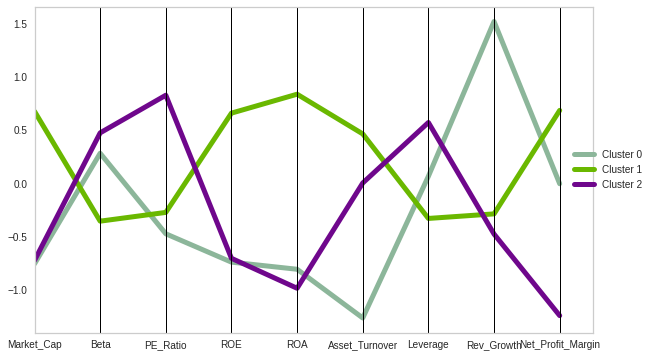

In [ ]:
# visualization of the different clusters

centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
fig = plt.figure(figsize=(10, 6))
plt.figure(figsize=(10,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(0.0,8.5)

In [ ]:
#Convert Categorical to numerical

pharma_df = pharma_df.drop(columns='Symbol')
new_df = pd.get_dummies(pharma_df, prefix_sep='_', drop_first=True)
new_df

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation_Moderate Buy,Median_Recommendation_Moderate Sell,Median_Recommendation_Strong Buy,Location_FRANCE,Location_GERMANY,Location_IRELAND,Location_SWITZERLAND,Location_UK,Location_US,Exchange_NASDAQ,Exchange_NYSE
Name,,,,,,,,,,,,,,,,,,,,
Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,1,0,0,0,0,0,0,0,1,0,1
"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,1,0,0,0,0,0,0,0,0,0,1
Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,0,0,1,0,0,0,0,1,0,0,1
AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,0,1,0,0,0,0,0,1,0,0,1
Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,1,0,0,1,0,0,0,0,0,0,1
Bayer AG,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,0,0,0,0,1,0,0,0,0,0,1
Bristol-Myers Squibb Company,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6,0,1,0,0,0,0,0,0,1,0,1
"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,1,0,0,0,0,0,0,0,1,1,0
"Elan Corporation, plc",0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3,0,1,0,0,0,1,0,0,0,0,1


In [ ]:
#Run clustering with new data with categorical variables
# Normalized distance
new_df_num_norm = new_df.apply(preprocessing.scale, axis=0)

# Fit a k-Means clustering with k=3 clusters
new_kmeans = KMeans(n_clusters=3, random_state=0).fit(new_df_num_norm)

# Cluster membership
new_memb = pd.Series(new_kmeans.labels_, index=new_df_num_norm.index)
print('\033[1m'+'k-Means cluster membership:'+'\033[0m')
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

k-Means cluster membership:
0 :  Aventis, Elan Corporation, plc, Medicis Pharmaceutical Corporation, Watson Pharmaceuticals, Inc.
1 :  Abbott Laboratories, AstraZeneca PLC, Bristol-Myers Squibb Company, Eli Lilly and Company, GlaxoSmithKline plc, Johnson & Johnson, Merck & Co., Inc., Novartis AG, Pfizer Inc, Schering-Plough Corporation, Wyeth
2 :  Allergan, Inc., Amersham plc, Bayer AG, Chattem, Inc, IVAX Corporation, Pharmacia Corporation


**With categorical variables, cluster membership remains unchanged.**

In [ ]:
#Create a column with the assigned clusters
cluster0 = ['Aventis', 'Elan Corporation, plc', 'Medicis Pharmaceutical Corporation', 'Watson Pharmaceuticals, Inc.']
cluster1 = ['Abbott Laboratories', 'AstraZeneca PLC', 'Bristol-Myers Squibb Company', 'Eli Lilly and Company', 'GlaxoSmithKline plc', 'Johnson & Johnson', 'Merck & Co., Inc.', 'Novartis AG', 'Pfizer Inc', 'Schering-Plough Corporation', 'Wyeth']
cluster2 = ['Allergan, Inc.', 'Amersham plc', 'Bayer AG', 'Chattem, Inc', 'IVAX Corporation', 'Pharmacia Corporation']


pharma_df['Cluster'] = num_df.index
pharma_df.loc[cluster0,'Cluster'] = 0 
pharma_df.loc[cluster1,'Cluster'] = 1 
pharma_df.loc[cluster2,'Cluster'] = 2


#look at values of each cluster:
pharma_df.sort_values(by=['Cluster'])

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange,Cluster
Name,,,,,,,,,,,,,
Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE,0
Medicis Pharmaceutical Corporation,1.20,0.75,28.6,11.2,5.4,0.3,0.93,30.37,21.3,Moderate Buy,US,NYSE,0
"Elan Corporation, plc",0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3,Moderate Sell,IRELAND,NYSE,0
"Watson Pharmaceuticals, Inc.",3.26,0.24,18.4,10.2,6.8,0.5,0.20,29.18,15.1,Moderate Sell,US,NYSE,0
Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE,1
Schering-Plough Corporation,34.10,0.51,18.9,22.6,13.3,0.8,0.00,8.56,17.6,Hold,US,NYSE,1
Pfizer Inc,199.47,0.65,23.6,45.6,19.2,0.8,0.16,25.54,25.2,Moderate Buy,US,NYSE,1
Novartis AG,96.65,0.19,21.6,17.9,11.2,0.5,0.06,-2.69,22.4,Hold,SWITZERLAND,NYSE,1
"Merck & Co., Inc.",132.56,0.46,18.9,40.6,15.0,1.1,0.28,17.35,14.1,Hold,US,NYSE,1


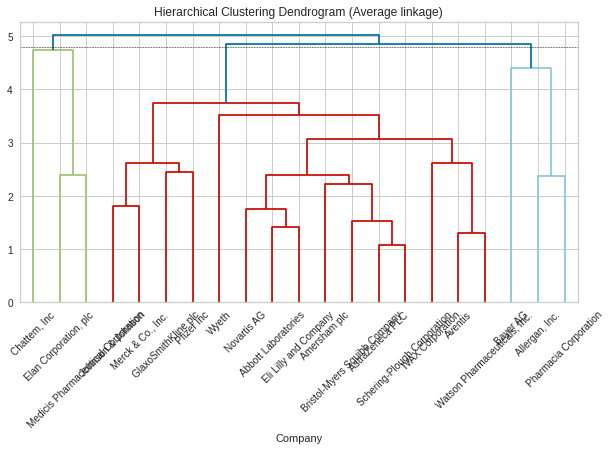

In [ ]:
#Average Distance: Hierarchical Clustering to examine the cluster groups to validate k-means clusters for ourselves, not for the questions
Z = linkage(num_df_norm, method='average')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
plt.xlabel('Company')
dendrogram(Z, labels=num_df_norm.index, color_threshold=4.8)
plt.axhline(y=4.8, color='black', linewidth=0.5, linestyle='dashed')
plt.show()